In [14]:
import pandas as pd
gt_feature = pd.read_parquet("../ground_truth_feature.parquet")

In [121]:
gt_feature.iloc[0]

full_caption         caption did you know henry ford made the 8 hou...
username                                                        36mktg
Openness                                                           1.0
Conscientiousness                                                  1.0
Extroversion                                                       1.0
Agreeableness                                                      1.0
Neuroticism                                                        0.0
Name: 59, dtype: object

In [48]:
pred_feature = pd.read_parquet("../prediction_feature.parquet")

In [51]:
# collect openness empath scores
openness_empath_cat_top3 = list(set(sim_df[sim_df['trait']==traits[0]].groupby("paper_v").apply(pd.DataFrame.nlargest, n=3, columns='cosine_similarity').empath_cat.tolist()))

def collect_score(r):
    empath_score = lexicon.analyze(r.full_caption, categories=openness_empath_cat_top3, normalize=True)
    return pd.Series([*empath_score.values()])

pred_feature[openness_empath_cat_top3] = pred_feature.apply(collect_score, axis=1) 

In [69]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=120,gen_min_span_tree=True)
clusterer.fit(pred_feature[openness_empath_cat_top3])
from collections import Counter
Counter(clusterer.labels_)

Counter({3: 6543, -1: 5633, 2: 544, 4: 1116, 0: 162, 1: 242})

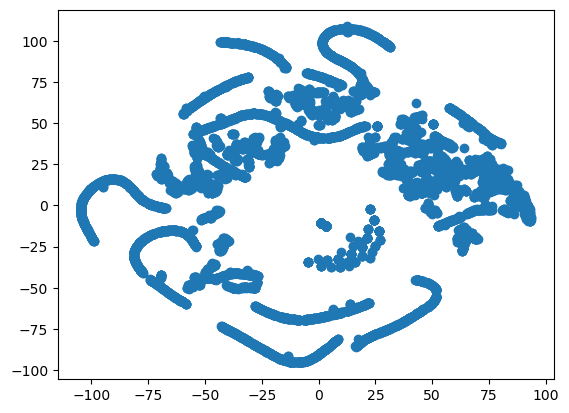

In [76]:
from  sklearn import datasets
from sklearn.manifold import TSNE
data = pred_feature[openness_empath_cat_top3]
projection = TSNE().fit_transform(data)
plt.scatter(*projection.T)

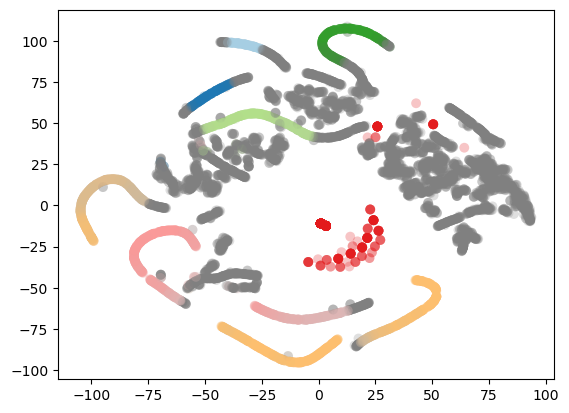

In [86]:
import seaborn as sns
clusterer = hdbscan.HDBSCAN(min_cluster_size=80).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [87]:
color_palette

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

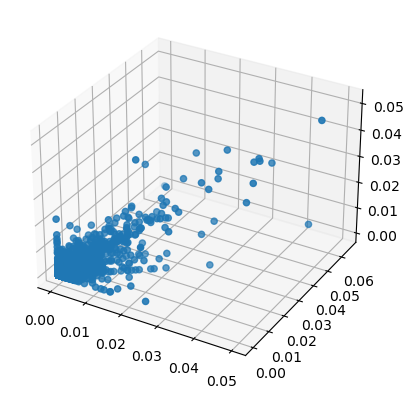

In [55]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.scatter(pred_feature[openness_empath_cat_top3[0]], pred_feature[openness_empath_cat_top3[1]], pred_feature[openness_empath_cat_top3[2]],marker='o')

plt.show()

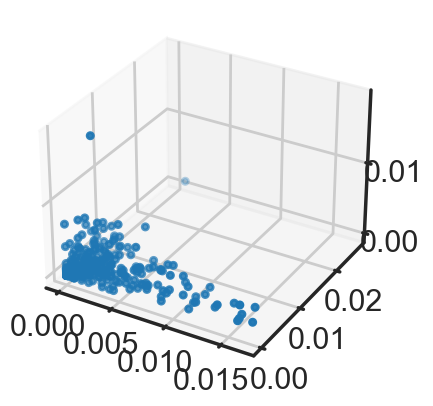

In [236]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.scatter(gt_feature[extraversion_empath_cat_top3[0]], gt_feature[extraversion_empath_cat_top3[1]], gt_feature[extraversion_empath_cat_top3[2]],marker='o')

plt.show()

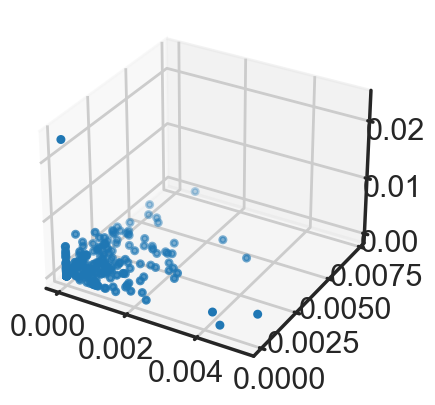

In [237]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.scatter(gt_feature[const_empath_cat_top3[0]], gt_feature[const_empath_cat_top3[1]], gt_feature[const_empath_cat_top3[2]],marker='o')

plt.show()

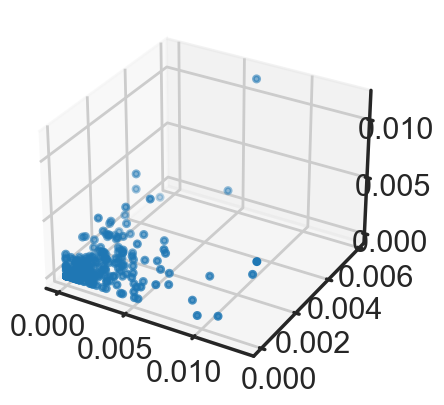

In [240]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.scatter(gt_feature[agreeable_empath_cat_top3[0]], gt_feature[agreeable_empath_cat_top3[1]], gt_feature[agreeable_empath_cat_top3[2]],marker='o')

plt.show()

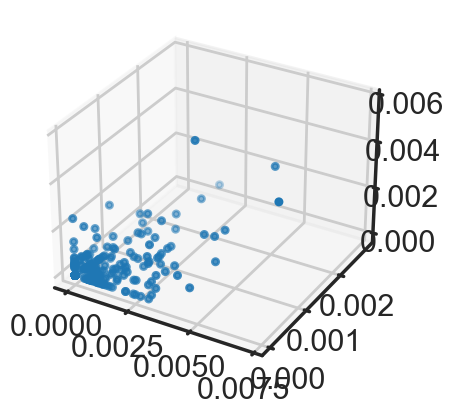

In [241]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.scatter(gt_feature[neuro_empath_cat_top5[0]], gt_feature[neuro_empath_cat_top5[1]], gt_feature[neuro_empath_cat_top5[2]],marker='o')

plt.show()

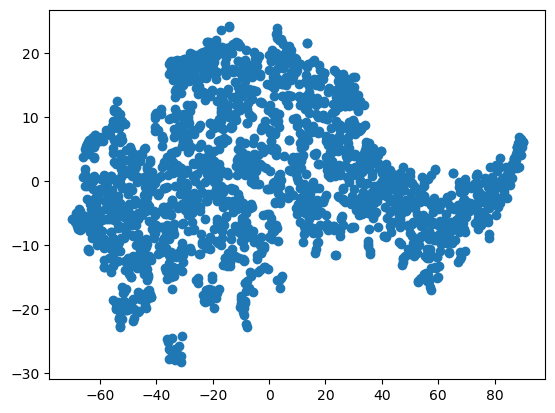

In [94]:
from  sklearn import datasets
from sklearn.manifold import TSNE
data = pred_feature[const_empath_cat_top3].sample(2000)
projection = TSNE().fit_transform(data)
plt.scatter(*projection.T)

In [102]:
Counter(clusterer.labels_)

Counter({0: 107, -1: 1787, 2: 30, 1: 50, 3: 26})

In [103]:
dir(HDBSCAN)

NameError: name 'HDBSCAN' is not defined

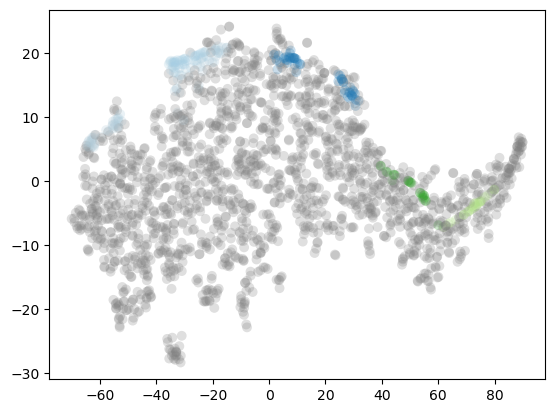

In [101]:
import seaborn as sns

clusterer = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=10, ).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [88]:
# collect contentiousness empath scores
const_empath_cat_top3 = list(set(sim_df[sim_df['trait']==traits[1]].groupby("paper_v").apply(pd.DataFrame.nlargest, n=3, columns='cosine_similarity').empath_cat.tolist()))

def collect_score(r):
    empath_score = lexicon.analyze(r.full_caption, categories=const_empath_cat_top3, normalize=True)
    return pd.Series([*empath_score.values()])

pred_feature[const_empath_cat_top3] = pred_feature.apply(collect_score, axis=1) 

In [26]:
import hdbscan
from collections import Counter
for i in range(2,10):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=i, gen_min_span_tree=True)
    clusterer.fit(gt_feature[const_empath_cat_top3])
    print(i, Counter(clusterer.labels_))

2 Counter({1: 247, -1: 12, 0: 10})
3 Counter({1: 245, -1: 14, 0: 10})
4 Counter({1: 243, -1: 16, 0: 10})
5 Counter({1: 241, -1: 20, 0: 8})
6 Counter({1: 239, -1: 24, 0: 6})
7 Counter({-1: 202, 1: 45, 0: 22})
8 Counter({-1: 215, 1: 38, 0: 16})
9 Counter({-1: 226, 0: 28, 1: 15})


In [29]:
for i in range(2,10):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=6, min_samples=i, gen_min_span_tree=True)
    clusterer.fit(gt_feature[const_empath_cat_top3])
    print(i, Counter(clusterer.labels_))

2 Counter({1: 247, -1: 12, 0: 10})
3 Counter({1: 245, -1: 14, 0: 10})
4 Counter({1: 243, -1: 16, 0: 10})
5 Counter({1: 241, -1: 20, 0: 8})
6 Counter({1: 239, -1: 24, 0: 6})
7 Counter({-1: 226, 0: 22, 2: 15, 1: 6})
8 Counter({-1: 215, 1: 38, 0: 16})
9 Counter({-1: 233, 1: 15, 0: 15, 2: 6})


In [40]:
# collect extraversion empath scores
extraversion_empath_cat_top3 = list(set(sim_df[sim_df['trait']==traits[2]].groupby("paper_v").apply(pd.DataFrame.nlargest, n=3, columns='cosine_similarity').empath_cat.tolist()))

def collect_score(r):
    empath_score = lexicon.analyze(r.full_caption, categories=extraversion_empath_cat_top3, normalize=True)
    return pd.Series([*empath_score.values()])

gt_feature[extraversion_empath_cat_top3] = gt_feature.apply(collect_score, axis=1) 

In [41]:
gt_feature[extraversion_empath_cat_top3]

,domestic_work,movement,nervousness,white_collar_job,work,hearing
59,0.000898,0.001346,0.000898,0.003142,0.014363,0.003142
69,0.002823,0.000000,0.000706,0.000706,0.000706,0.000000
26,0.000000,0.000000,0.000000,0.000000,0.002454,0.002454
57,0.000000,0.001978,0.001318,0.000000,0.001318,0.001318
10,0.000806,0.002419,0.000000,0.000806,0.000806,0.004839
...,...,...,...,...,...,...
71,0.001120,0.000000,0.003359,0.001120,0.004479,0.000000
14,0.001426,0.001426,0.000713,0.000713,0.003922,0.000713
5461,0.000000,0.000887,0.000000,0.000000,0.000000,0.000887
67,0.000934,0.004516,0.003737,0.001401,0.003893,0.000467


In [42]:
for i in range(2,10):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=i, gen_min_span_tree=True)
    clusterer.fit(gt_feature[extraversion_empath_cat_top3])
    print(i, Counter(clusterer.labels_))

2 Counter({-1: 169, 23: 18, 14: 11, 10: 6, 17: 5, 20: 5, 19: 4, 12: 4, 4: 4, 15: 4, 11: 4, 0: 4, 2: 3, 22: 3, 8: 3, 7: 3, 13: 3, 9: 2, 18: 2, 3: 2, 16: 2, 5: 2, 1: 2, 6: 2, 21: 2})
3 Counter({-1: 190, 8: 41, 4: 8, 2: 6, 5: 4, 6: 4, 7: 4, 3: 4, 1: 4, 0: 4})
4 Counter({-1: 185, 3: 68, 1: 8, 0: 4, 2: 4})
5 Counter({-1: 165, 1: 96, 0: 8})
6 Counter({-1: 170, 0: 93, 1: 6})
7 Counter({-1: 269})
8 Counter({-1: 269})
9 Counter({-1: 269})


In [44]:
for i in range(1,10):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=i,gen_min_span_tree=True)
    clusterer.fit(gt_feature[extraversion_empath_cat_top3])
    print(i, Counter(clusterer.labels_))

1 Counter({-1: 180, 7: 27, 4: 13, 1: 11, 3: 9, 6: 7, 5: 7, 0: 5, 8: 5, 2: 5})
2 Counter({-1: 208, 5: 24, 2: 11, 0: 9, 1: 7, 3: 5, 4: 5})
3 Counter({-1: 141, 1: 114, 2: 8, 0: 6})
4 Counter({-1: 158, 0: 103, 1: 8})
5 Counter({-1: 165, 1: 96, 0: 8})
6 Counter({-1: 170, 0: 93, 1: 6})
7 Counter({-1: 166, 1: 98, 0: 5})
8 Counter({-1: 269})
9 Counter({-1: 269})


In [45]:
# collect agreeable empath scores
agreeable_empath_cat_top3 = list(set(sim_df[sim_df['trait']==traits[3]].groupby("paper_v").apply(pd.DataFrame.nlargest, n=3, columns='cosine_similarity').empath_cat.tolist()))

def collect_score(r):
    empath_score = lexicon.analyze(r.full_caption, categories=agreeable_empath_cat_top3, normalize=True)
    return pd.Series([*empath_score.values()])

gt_feature[agreeable_empath_cat_top3] = gt_feature.apply(collect_score, axis=1) 

In [47]:
for i in range(2,10):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=i, gen_min_span_tree=True)
    clusterer.fit(gt_feature[agreeable_empath_cat_top3])
    print(i, Counter(clusterer.labels_))


2 Counter({-1: 157, 23: 20, 10: 11, 18: 8, 6: 6, 16: 6, 19: 4, 2: 4, 20: 4, 0: 4, 21: 4, 8: 4, 11: 3, 5: 3, 12: 3, 9: 3, 22: 3, 3: 3, 1: 3, 24: 3, 17: 3, 13: 2, 4: 2, 15: 2, 7: 2, 14: 2})
3 Counter({-1: 192, 7: 27, 1: 16, 4: 12, 0: 6, 5: 5, 3: 4, 6: 4, 2: 3})
4 Counter({-1: 194, 2: 41, 1: 13, 3: 11, 4: 6, 0: 4})
5 Counter({-1: 190, 3: 41, 2: 24, 0: 8, 1: 6})
6 Counter({-1: 207, 0: 40, 1: 22})
7 Counter({-1: 200, 1: 42, 2: 20, 0: 7})
8 Counter({-1: 210, 1: 41, 0: 18})
9 Counter({-1: 211, 0: 41, 1: 17})


In [213]:
# collect agreeable empath scores
neuro_empath_cat_top5 = list(set(sim_df[sim_df['trait']==traits[4]].groupby("paper_v").apply(pd.DataFrame.nlargest, n=3, columns='cosine_similarity').empath_cat.tolist()))

def collect_score(r):
    empath_score = lexicon.analyze(r.full_caption, categories=neuro_empath_cat_top5, normalize=True)
    return pd.Series([*empath_score.values()])

gt_feature[neuro_empath_cat_top5] = gt_feature.apply(collect_score, axis=1) 

In [216]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=7, gen_min_span_tree=True)
clusterer.fit(gt_feature[neuro_empath_cat_top5])
Counter(clusterer.labels_)

Counter({1: 81, -1: 171, 0: 9, 2: 8})

<Axes: >

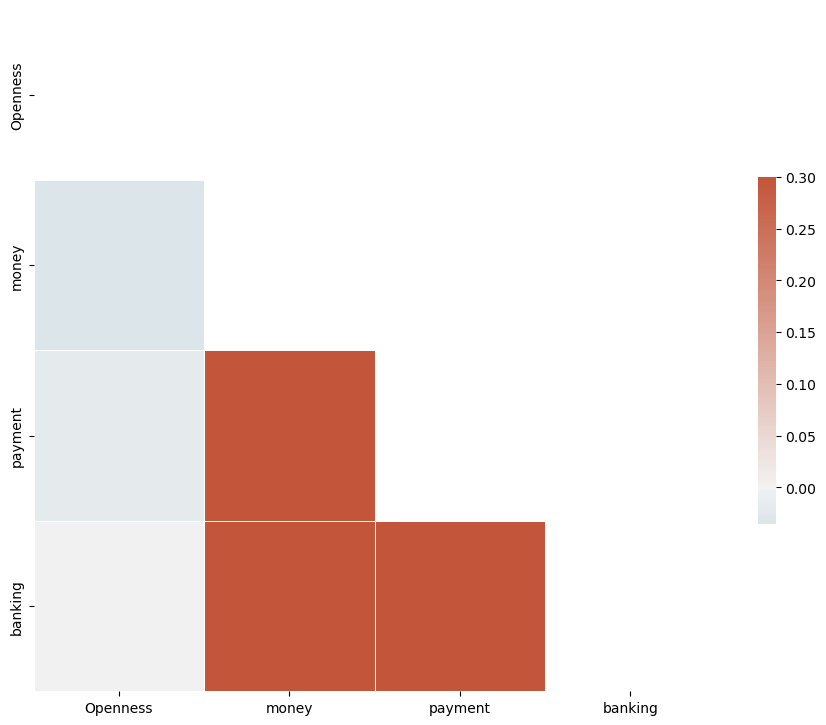

In [146]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols = [traits[0]]
cols.extend(openness_empath_cat_top3)
cols
corr = gt_feature[cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [147]:
from scipy import stats
for col in openness_empath_cat_top3:
    print(col, stats.ks_2samp(gt_feature[traits[0]], gt_feature[col]))

money KstestResult(statistic=0.5092936802973977, pvalue=3.940362219492911e-32, statistic_location=1.0, statistic_sign=1)
payment KstestResult(statistic=0.4163568773234201, pvalue=2.886549535822382e-21, statistic_location=1.0, statistic_sign=1)
banking KstestResult(statistic=0.38661710037174724, pvalue=2.574068978884984e-18, statistic_location=1.0, statistic_sign=1)


In [160]:
gt_feature[openness_empath_cat_top3].shape

(269, 3)

In [191]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=6, gen_min_span_tree=True)
clusterer.fit(gt_feature[openness_empath_cat_top3])
from collections import Counter
Counter(clusterer.labels_)

Counter({-1: 180, 1: 68, 2: 13, 0: 8})

/Users/bohaocao/anaconda3/lib/python3.10/site-packages/hdbscan/plots.py:383: UserWarning: Infinite lambda values encountered in chosen clusters. This might be due to duplicates in the data.
  warn('Infinite lambda values encountered in chosen clusters.'


<Axes: ylabel='$\\lambda$ value'>

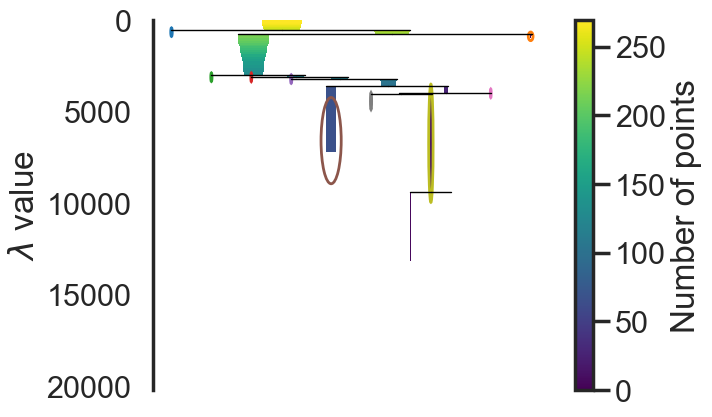

In [188]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [183]:
clusterer.probabilities_

array([0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.89055716,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.3103268 ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.88512062, 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.     

In [124]:
empath_score = lexicon.analyze(gt_feature.iloc[0].full_caption, normalize=True)
empath_score

{'help': 0.0026929982046678637,
 'office': 0.0058348294434470375,
 'dance': 0.0008976660682226212,
 'money': 0.0013464991023339318,
 'wedding': 0.0,
 'domestic_work': 0.0008976660682226212,
 'sleep': 0.0004488330341113106,
 'medical_emergency': 0.0008976660682226212,
 'cold': 0.0004488330341113106,
 'hate': 0.0004488330341113106,
 'cheerfulness': 0.0,
 'aggression': 0.0,
 'occupation': 0.0031418312387791743,
 'envy': 0.0,
 'anticipation': 0.0,
 'family': 0.0013464991023339318,
 'vacation': 0.0013464991023339318,
 'crime': 0.0,
 'attractive': 0.0013464991023339318,
 'masculine': 0.0004488330341113106,
 'prison': 0.0,
 'health': 0.0,
 'pride': 0.002244165170556553,
 'dispute': 0.0008976660682226212,
 'nervousness': 0.0008976660682226212,
 'government': 0.0026929982046678637,
 'weakness': 0.0,
 'horror': 0.0,
 'swearing_terms': 0.0013464991023339318,
 'leisure': 0.0008976660682226212,
 'suffering': 0.0004488330341113106,
 'royalty': 0.0,
 'wealthy': 0.0008976660682226212,
 'tourism': 0.0,

In [19]:
empath_score_df

,category,score
0,help,0.002693
1,office,0.005835
2,dance,0.000898
3,money,0.001346
4,wedding,0.000000
...,...,...
189,contentment,0.000449
190,writing,0.002693
191,rural,0.000000
192,positive_emotion,0.008977


,category,score
179,payment,0.004937
40,banking,0.003142
3,money,0.001346


In [35]:
paper_significant_contributors = {
    'Openness':['Money Words(e.g. Audit, cash, owe)'],
    'Conscientiousness':['Swear Words','Social Processes (e.g. Mate, talk, they, child)','Human Words (e.g. baby, man)','Perceptual Processes (e.g. Observing, heard, feeling)','Seeing Words (e.g. View, saw, seen)'],
    'Extroversion': ['Perceptual Processes (e.g. Observing, heard, feeling)','Work Words (e.g. Job, majors, xerox)'],
    'Agreeableness': ['Affective Processes (e.g. Happy, cried, abandon)','Positive Emotions (e.g. Love, nice, sweet)','Biological Processes (e.g. Eat, blood, pain)'],
    'Neuroticism':['Anxiety Words (e.g. Worried, fearful, nervous)','Ingestion Words (e.g. Dish, eat, pizza)']
}

In [5]:
empath_categories = ['help', 'office', 'dance', 'money', 'wedding', 'domestic_work', 'sleep', 'medical_emergency', 'cold', 'hate', 'cheerfulness', 'aggression', 'occupation', 'envy', 'anticipation', 'family', 'vacation', 'crime', 'attractive', 'masculine', 'prison', 'health', 'pride', 'dispute', 'nervousness', 'government', 'weakness', 'horror', 'swearing_terms', 'leisure', 'suffering', 'royalty', 'wealthy', 'tourism', 'furniture', 'school', 'magic', 'beach', 'journalism', 'morning', 'banking', 'social_media', 'exercise', 'night', 'kill', 'blue_collar_job', 'art', 'ridicule', 'play', 'computer', 'college', 'optimism', 'stealing', 'real_estate', 'home', 'divine', 'sexual', 'fear', 'irritability', 'superhero', 'business', 'driving', 'pet', 'childish', 'cooking', 'exasperation', 'religion', 'hipster', 'internet', 'surprise', 'reading', 'worship', 'leader', 'independence', 'movement', 'body', 'noise', 'eating', 'medieval', 'zest', 'confusion', 'water', 'sports', 'death', 'healing', 'legend', 'heroic', 'celebration', 'restaurant', 'violence', 'programming', 'dominant_heirarchical', 'military', 'neglect', 'swimming', 'exotic', 'love', 'hiking', 'communication', 'hearing', 'order', 'sympathy', 'hygiene', 'weather', 'anonymity', 'trust', 'ancient', 'deception', 'fabric', 'air_travel', 'fight', 'dominant_personality', 'music', 'vehicle', 'politeness', 'toy', 'farming', 'meeting', 'war', 'speaking', 'listen', 'urban', 'shopping', 'disgust', 'fire', 'tool', 'phone', 'gain', 'sound', 'injury', 'sailing', 'rage', 'science', 'work', 'appearance', 'valuable', 'warmth', 'youth', 'sadness', 'fun', 'emotional', 'joy', 'affection', 'traveling', 'fashion', 'ugliness', 'lust', 'shame', 'torment', 'economics', 'anger', 'politics', 'ship', 'clothing', 'car', 'strength', 'technology', 'breaking', 'shape_and_size', 'power', 'white_collar_job', 'animal', 'party', 'terrorism', 'smell', 'disappointment', 'poor', 'plant', 'pain', 'beauty', 'timidity', 'philosophy', 'negotiate', 'negative_emotion', 'cleaning', 'messaging', 'competing', 'law', 'friends', 'payment', 'achievement', 'alcohol', 'liquid', 'feminine', 'weapon', 'children', 'monster', 'ocean', 'giving', 'contentment', 'writing', 'rural', 'positive_emotion', 'musical']

len(empath_categories)

194

In [39]:
from sentence_transformers import SentenceTransformer
from scipy import spatial
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

empath_word_embeddings = {}
for cat in empath_categories:
    embeddings = model.encode(cat)
    empath_word_embeddings[cat] = embeddings
sim = []

# Sentences we want to encode. Example:
for trait, values in paper_significant_contributors.items():
    for v in values:
        paper_embedding = model.encode(v)
        for empath_cat, empath_embedding in empath_word_embeddings.items():
            cosine_sim = 1 - spatial.distance.cosine(
                paper_embedding, 
                empath_embedding
                )
            d = {
                "trait": trait, 
                "paper_v": v,
                "empath_cat": empath_cat,
                "cosine_similarity": cosine_sim
            }
            sim.append(d)

import pandas as pd
sim_df = pd.DataFrame(sim)

#Sentences are encoded by calling model.encode()
#embeddings = model.encode(sentences)


#result = 1-spatial.distance.cosine(embeddings[0], embeddings[1])
#result
#cosine_similarity([embeddings[0]], [embeddings[1]])

embeddings.shape

In [12]:
traits = [*paper_significant_contributors.keys()]
traits

['Openness',
 'Conscientiousness',
 'Extroversion',
 'Agreeableness',
 'Neuroticism']

In [217]:
sim_df

,trait,paper_v,empath_cat,cosine_similarity
0,Openness,"Money Words(e.g. Audit, cash, owe)",help,0.192595
1,Openness,"Money Words(e.g. Audit, cash, owe)",office,0.237726
2,Openness,"Money Words(e.g. Audit, cash, owe)",dance,-0.041596
3,Openness,"Money Words(e.g. Audit, cash, owe)",money,0.655185
4,Openness,"Money Words(e.g. Audit, cash, owe)",wedding,0.051560
...,...,...,...,...
2323,Neuroticism,"Ingestion Words (e.g. Dish, eat, pizza)",contentment,0.302847
2324,Neuroticism,"Ingestion Words (e.g. Dish, eat, pizza)",writing,0.156750
2325,Neuroticism,"Ingestion Words (e.g. Dish, eat, pizza)",rural,-0.037413
2326,Neuroticism,"Ingestion Words (e.g. Dish, eat, pizza)",positive_emotion,0.242114


In [130]:
sim_df[sim_df['trait']==traits[0]].groupby("paper_v").apply(pd.DataFrame.nlargest, n=3, columns='cosine_similarity').empath_cat.tolist()

['money', 'payment', 'banking']

In [116]:
sim_df[sim_df['trait']==traits[1]].groupby("paper_v").apply(pd.DataFrame.nlargest, n=3, columns='cosine_similarity')

trait  \
paper_v                                                                      
Human Words (e.g. baby, man)                       701   Conscientiousness   
                                                   601   Conscientiousness   
                                                   610   Conscientiousness   
Perceptual Processes (e.g. Observing, heard, fe... 875   Conscientiousness   
                                                   850   Conscientiousness   
                                                   800   Conscientiousness   
Seeing Words (e.g. View, saw, seen)                1069  Conscientiousness   
                                                   1104  Conscientiousness   
                                                   1040  Conscientiousness   
Social Processes (e.g. Mate, talk, they, child)    486   Conscientiousness   
                                                   462   Conscientiousness   
                                                   429   Conscientiousness   
Swear Words                                        222   Conscientiousness   
                                                   325   Conscientiousness   
                                                   270   Conscientiousness   

                                                                                                   paper_v  \
paper_v                                                                                                      
Human Words (e.g. baby, man)                       701                        Human Words (e.g. baby, man)   
                                                   601                        Human Words (e.g. baby, man)   
                                                   610                        Human Words (e.g. baby, man)   
Perceptual Processes (e.g. Observing, heard, fe... 875   Perceptual Processes (e.g. Observing, heard, f...   
                                                   850   Perceptual Processes (e.g. Observing, heard, f...   
                                                   800   Perceptual Processes (e.g. Observing, heard, f...   
Seeing Words (e.g. View, saw, seen)                1069                Seeing Words (e.g. View, saw, seen)   
                                                   1104                Seeing Words (e.g. View, saw, seen)   
                                                   1040                Seeing Words (e.g. View, saw, seen)   
Social Processes (e.g. Mate, talk, they, child)    486     Social Processes (e.g. Mate, talk, they, child)   
                                                   462     Social Processes (e.g. Mate, talk, they, child)   
                                                   429     Social Processes (e.g. Mate, talk, they, child)   
Swear Words                                        222                                         Swear Words   
                                                   325                                         Swear Words   
                                                   270                                         Swear Words   

                                                             empath_cat  \
paper_v                                                                   
Human Words (e.g. baby, man)                       701         speaking   
                                                   601        masculine   
                                                   610   swearing_terms   
Perceptual Processes (e.g. Observing, heard, fe... 875          hearing   
                                                   850         movement   
                                                   800      nervousness   
Seeing Words (e.g. View, saw, seen)                1069         hearing   
                                                   1104      appearance   
                                                   1040         reading   
Social Processes (e.g. Mate, talk, they, child

In [117]:
sim_df[sim_df['trait']==traits[2]].groupby("paper_v").apply(pd.DataFrame.nlargest, n=3, columns='cosine_similarity')

trait  \
paper_v                                                                 
Perceptual Processes (e.g. Observing, heard, fe... 1297  Extroversion   
                                                   1238  Extroversion   
                                                   1263  Extroversion   

                                                                                                   paper_v  \
paper_v                                                                                                      
Perceptual Processes (e.g. Observing, heard, fe... 1297  Perceptual Processes (e.g. Observing, heard, f...   
                                                   1238  Perceptual Processes (e.g. Observing, heard, f...   
                                                   1263  Perceptual Processes (e.g. Observing, heard, f...   

                                                        empath_cat  \
paper_v                                                              
Perceptual Processes (e.g. Observing, heard, fe... 1297       work   
                                                   1238   movement   
                                                   1263    hearing   

                                                         cosine_similarity  
paper_v                                                                     
Perceptual Processes (e.g. Observing, heard, fe... 1297           0.455862  
                                                   1238           0.445329  
                                                   1263           0.440753

In [118]:
sim_df[sim_df['trait']==traits[3]].groupby("paper_v").apply(pd.DataFrame.nlargest, n=3, columns='cosine_similarity')

trait  \
paper_v                                                                
Affective Processes (e.g. Happy, cried, abandon) 1498  Agreeableness   
                                                 1550  Agreeableness   
                                                 1531  Agreeableness   
Biological Processes (e.g. Eat, blood, pain)     1914  Agreeableness   
                                                 1821  Agreeableness   
                                                 1776  Agreeableness   
Positive Emotions (e.g. Love, nice, sweet)       1744  Agreeableness   
                                                 1725  Agreeableness   
                                                 1692  Agreeableness   

                                                                                                paper_v  \
paper_v                                                                                                   
Affective Processes (e.g. Happy, cried, abandon) 1498  Affective Processes (e.g. Happy, cried, abandon)   
                                                 1550  Affective Processes (e.g. Happy, cried, abandon)   
                                                 1531  Affective Processes (e.g. Happy, cried, abandon)   
Biological Processes (e.g. Eat, blood, pain)     1914      Biological Processes (e.g. Eat, blood, pain)   
                                                 1821      Biological Processes (e.g. Eat, blood, pain)   
                                                 1776      Biological Processes (e.g. Eat, blood, pain)   
Positive Emotions (e.g. Love, nice, sweet)       1744        Positive Emotions (e.g. Love, nice, sweet)   
                                                 1725        Positive Emotions (e.g. Love, nice, sweet)   
                                                 1692        Positive Emotions (e.g. Love, nice, sweet)   

                                                             empath_cat  \
paper_v                                                                   
Affective Processes (e.g. Happy, cried, abandon) 1498         emotional   
                                                 1550  positive_emotion   
                                                 1531  negative_emotion   
Biological Processes (e.g. Eat, blood, pain)     1914              pain   
                                                 1821              body   
                                                 1776         suffering   
Positive Emotions (e.g. Love, nice, sweet)       1744  positive_emotion   
                                                 1725  negative_emotion   
                                                 1692         emotional   

                                                       cosine_similarity  
paper_v                                                                   
Affective Processes (e.g. Happy, cried, abandon) 1498           0.633946  
                                                 1550           0.623043  
                                                 1531           0.595508  
Biological Processes (e.g. Eat, blood, pain)     1914           0.458944  
                                                 1821           0.422259  
                                                 1776           0.384183  
Positive Emotions (e.g. Love, nice, sweet)       1744           0.847702  
                                                 1725           0.699090  
                                                 1692           0.694918

In [119]:
sim_df[sim_df['trait']==traits[4]].groupby("paper_v").apply(pd.DataFrame.nlargest, n=3, columns='cosine_similarity')

trait  \
paper_v                                                            
Anxiety Words (e.g. Worried, fearful, nervous) 1964  Neuroticism   
                                               1997  Neuroticism   
                                               2113  Neuroticism   
Ingestion Words (e.g. Dish, eat, pizza)        2211  Neuroticism   
                                               2257  Neuroticism   
                                               2181  Neuroticism   

                                                                                            paper_v  \
paper_v                                                                                               
Anxiety Words (e.g. Worried, fearful, nervous) 1964  Anxiety Words (e.g. Worried, fearful, nervous)   
                                               1997  Anxiety Words (e.g. Worried, fearful, nervous)   
                                               2113  Anxiety Words (e.g. Worried, fearful, nervous)   
Ingestion Words (e.g. Dish, eat, pizza)        2211         Ingestion Words (e.g. Dish, eat, pizza)   
                                               2257         Ingestion Words (e.g. Dish, eat, pizza)   
                                               2181         Ingestion Words (e.g. Dish, eat, pizza)   

                                                           empath_cat  \
paper_v                                                                 
Anxiety Words (e.g. Worried, fearful, nervous) 1964       nervousness   
                                               1997              fear   
                                               2113  negative_emotion   
Ingestion Words (e.g. Dish, eat, pizza)        2211            eating   
                                               2257           disgust   
                                               2181          ridicule   

                                                     cosine_similarity  
paper_v                                                                 
Anxiety Words (e.g. Worried, fearful, nervous) 1964           0.634211  
                                               1997           0.587407  
                                               2113           0.517868  
Ingestion Words (e.g. Dish, eat, pizza)        2211           0.578681  
                                               2257           0.382454  
                                               2181           0.377357